Case study: most common diagnoses

All diagnoses a patient received were recorded in
diagnoses_icd.
1. Count patients diagnosed for each ICD-9 code. Do
not count a patient more than once for each ICD-9.
2. Apply epsilon-differential privacy to reporting the
most common diagnosis
• refer to Example 3.4 and “Report Noisy Max” in the Privacy
Book
3. Compare the most common diagnosis reported
with and without epsilon-differential privacy, for the
following values for epsilon:
• 0.001, 0.01, 0.1, 1

#### Example 3.4 (Most Common Medical Condition). 
Suppose we wish to know which condition is (approximately) the most common in the medical histories of a set of respondents, so the set of questions is, for
each condition under consideration, whether the individual has ever
received a diagnosis of this condition. Since individuals can experience
many conditions, the sensitivity of this set of questions can be high.
Nonetheless, as we next describe, this task can be addressed using addition of Lap(1/ε) noise to each of the counts (note the small scale of the
noise, which is independent of the total number of conditions). Crucially, the m noisy counts themselves will not be released (although the
“winning” count can be released at no extra privacy cost).

#### Report Noisy Max. 
Consider the following simple algorithm to determine which of m counting queries has the highest value: Add independently generated Laplace noise Lap(1/ε) to each count and return the
index of the largest noisy count (we ignore the possibility of a tie). Call
this algorithm Report Noisy Max.

Note the “information minimization” principle at work in the
Report Noisy Max algorithm: rather than releasing all the noisy counts
and allowing the analyst to find the max and its index, only the
index corresponding to the maximum is made public. Since the data
of an individual can affect all counts, the vector of counts has high ℓ1-
sensitivity, specifically, ∆f = m, and much more noise would be needed
if we wanted to release all of the counts using the Laplace mechanism.

## DSBA 6160 Big data design, storage and Provenance

## Group 7 Challenge-1 Programming Script



In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
from scipy.stats import laplace  
import matplotlib.pyplot as plt

## SQL Query Output Screenshot

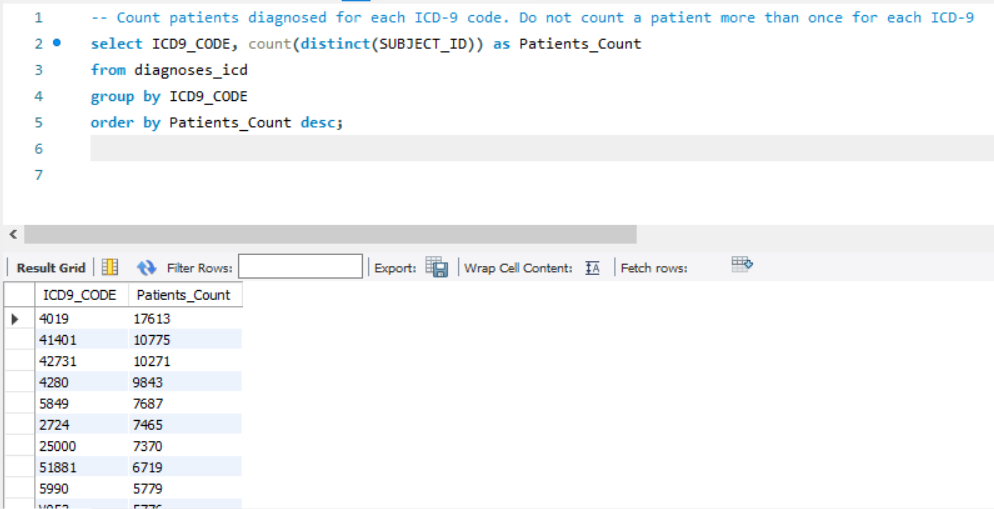

Importing the above output as a csv file and loading it here using Pandas dataframe.

In [ ]:
# Upload files in Google Colab from local directory
from google.colab import files
uploaded = files.upload()

Saving Case_Study_Data_Extract.csv to Case_Study_Data_Extract.csv


In [ ]:
# Read the loaded file as pandas series dataframe and display it
Case_Study_Data = pd.read_csv("Case_Study_Data_Extract.csv")
Case_Study_Data

,ICD9_CODE,Patients_Count
0,4019,17613
1,41401,10775
2,42731,10271
3,4280,9843
4,5849,7687
...,...,...
6980,V9010,1
6981,V902,1
6982,V9039,1
6983,V9089,1


# What is Differential Privacy
ε-differential privacy lets you balance the privacy and accuracy level with a positive value named ε (epsilon). If ε is small, then more privacy is preserved but data accuracy gets worse. If ε is large, privacy will be worse but data accuracy will be preserved. Note that ε goes from 0 to infinity.

Differential privacy libraries implement various techniques that take an epsilon parameter as input and adds random noise to values in the original dataset, proportionally to the given ε parameter. Thus, the smaller the epsilon value, the more noise will be added to the values.

Some libraries will take more parameters than just ε and may allow for control over how the random noise is added to the values in the original dataset, such as the probability distribution from which random numbers should be drawn from (Laplace, Normal, etc.).

Some of those libraries also implement the concept of privacy budget, where each call to a function in the library will use up a user-defined amount of the originally allocated privacy budget. The theory behind this is that every time new information is released, the probability that an attacker retrieves information about an individual in the dataset increases. Once the privacy budget is all used up, the library may raise an error instead of returning a value.

In [ ]:
# Laplace function
def laplace_Mechanism(x, epsilon):
  x +=  np.random.laplace(0, 1.0/epsilon, 1)[0]
  return x

In [ ]:
Case_Study_Data['Laplace_0.001'] = Case_Study_Data['Patients_Count'].apply(laplace_Mechanism, args=(0.001,)) 
Case_Study_Data

,ICD9_CODE,Patients_Count,Laplace_0.001
0,4019,17613,18184.977557
1,41401,10775,11878.020567
2,42731,10271,9281.840651
3,4280,9843,10970.199065
4,5849,7687,7496.515091
...,...,...,...
6980,V9010,1,-927.029651
6981,V902,1,-223.656331
6982,V9039,1,-718.957348
6983,V9089,1,-617.287010


In [ ]:
Case_Study_Data['Laplace_0.01'] = Case_Study_Data['Patients_Count'].apply(laplace_Mechanism, args=(0.01,)) 
Case_Study_Data

,ICD9_CODE,Patients_Count,Laplace_0.001,Laplace_0.01
0,4019,17613,18184.977557,17229.758364
1,41401,10775,11878.020567,10907.237448
2,42731,10271,9281.840651,10586.368827
3,4280,9843,10970.199065,9816.863368
4,5849,7687,7496.515091,7902.219431
...,...,...,...,...
6980,V9010,1,-927.029651,105.602069
6981,V902,1,-223.656331,55.462205
6982,V9039,1,-718.957348,22.631299
6983,V9089,1,-617.287010,142.258184


In [ ]:
Case_Study_Data['Laplace_0.1'] = Case_Study_Data['Patients_Count'].apply(laplace_Mechanism, args=(0.1,)) 
Case_Study_Data

,ICD9_CODE,Patients_Count,Laplace_0.001,Laplace_0.01,Laplace_0.1
0,4019,17613,18184.977557,17229.758364,17626.556455
1,41401,10775,11878.020567,10907.237448,10772.723957
2,42731,10271,9281.840651,10586.368827,10270.456889
3,4280,9843,10970.199065,9816.863368,9837.154576
4,5849,7687,7496.515091,7902.219431,7661.506248
...,...,...,...,...,...
6980,V9010,1,-927.029651,105.602069,3.418960
6981,V902,1,-223.656331,55.462205,19.497027
6982,V9039,1,-718.957348,22.631299,-0.255364
6983,V9089,1,-617.287010,142.258184,-4.794653


In [ ]:
Case_Study_Data['Laplace_1'] = Case_Study_Data['Patients_Count'].apply(laplace_Mechanism, args=(1,)) 
Case_Study_Data

,ICD9_CODE,Patients_Count,Laplace_0.001,Laplace_0.01,Laplace_0.1,Laplace_1
0,4019,17613,18184.977557,17229.758364,17626.556455,17614.479138
1,41401,10775,11878.020567,10907.237448,10772.723957,10775.162084
2,42731,10271,9281.840651,10586.368827,10270.456889,10273.570507
3,4280,9843,10970.199065,9816.863368,9837.154576,9842.678656
4,5849,7687,7496.515091,7902.219431,7661.506248,7687.069927
...,...,...,...,...,...,...
6980,V9010,1,-927.029651,105.602069,3.418960,2.557079
6981,V902,1,-223.656331,55.462205,19.497027,1.751624
6982,V9039,1,-718.957348,22.631299,-0.255364,1.911260
6983,V9089,1,-617.287010,142.258184,-4.794653,4.589408


In [ ]:
# Download the dataframe to a csv file for tableau Visualization
from google.colab import files

Case_Study_Data.to_csv('Case_Study_Data_Laplace.csv')
files.download('Case_Study_Data_Laplace.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

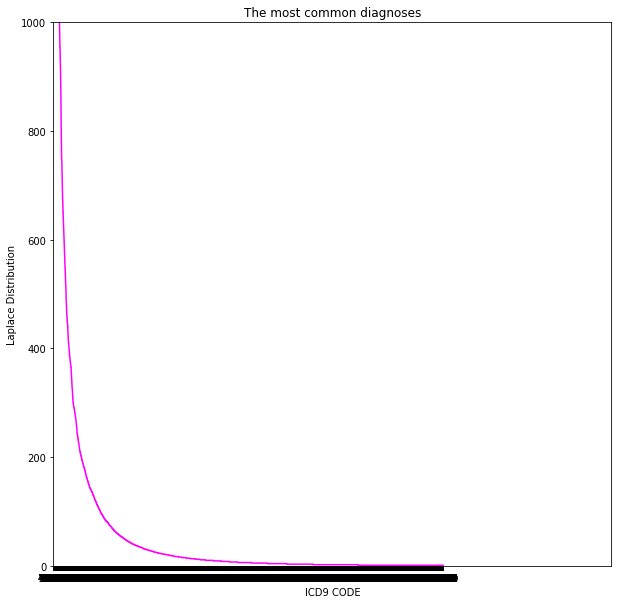

In [ ]:
# Plot visualization Original Values (with no Laplace distribution)
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Patients_Count = list(Case_Study_Data['Patients_Count'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 1000) 
plt.plot(ICD9_CODE, Patients_Count, color='magenta')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

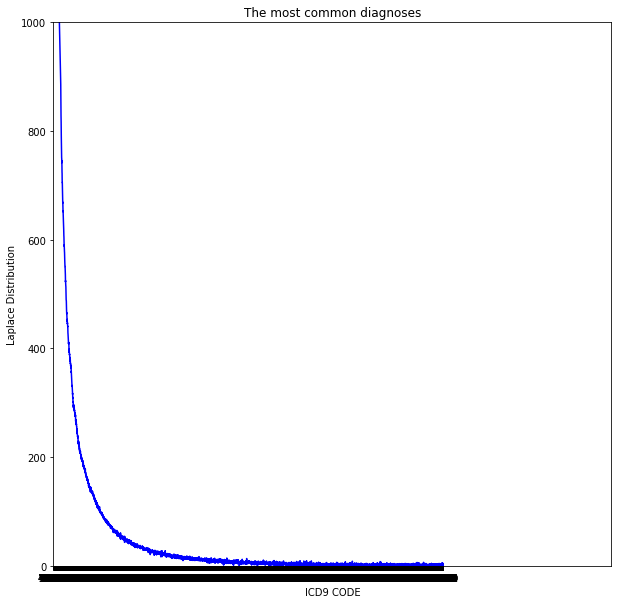

In [ ]:
# Plot visualization of Laplace distribution with Epsilon=1
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Laplace_1 = list(Case_Study_Data['Laplace_1'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 1000) 
plt.plot(ICD9_CODE, Laplace_1, color='blue')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

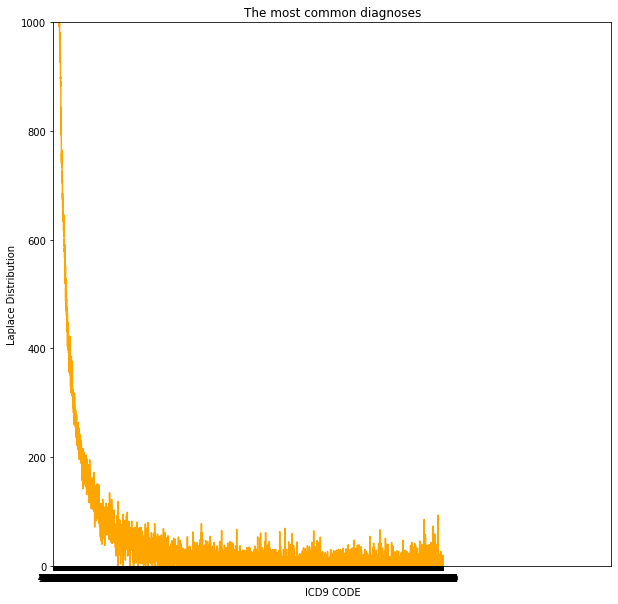

In [ ]:
# Plot visualization of Laplace distribution with Epsilon=0.1
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Laplace_2 = list(Case_Study_Data['Laplace_0.1'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 1000) 
plt.plot(ICD9_CODE, Laplace_2, color='orange')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

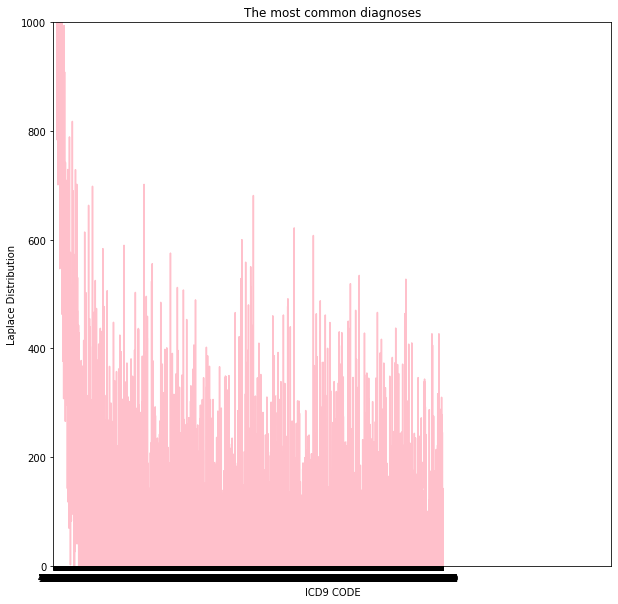

In [ ]:
# Plot visualization of Laplace distribution with Epsilon=0.01
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Laplace_3 = list(Case_Study_Data['Laplace_0.01'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 1000) 
plt.plot(ICD9_CODE, Laplace_3, color='pink')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

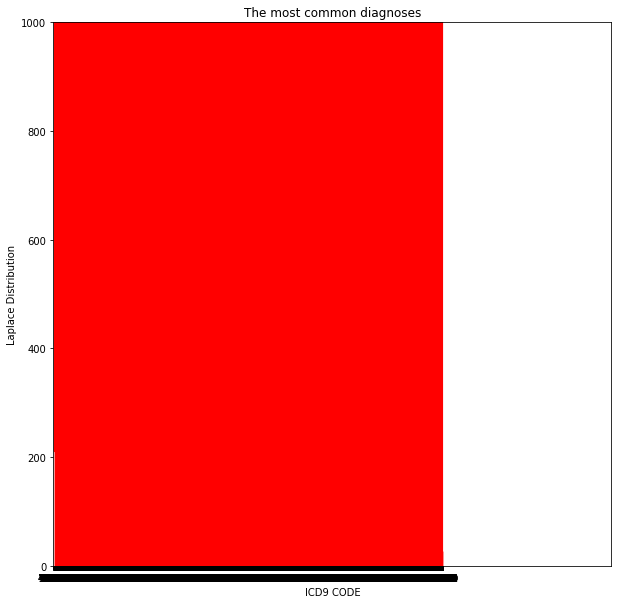

In [ ]:
# Plot visualization of Laplace distribution with Epsilon=0.001
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Laplace_4 = list(Case_Study_Data['Laplace_0.001'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 1000) 
plt.plot(ICD9_CODE, Laplace_4, color='red')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

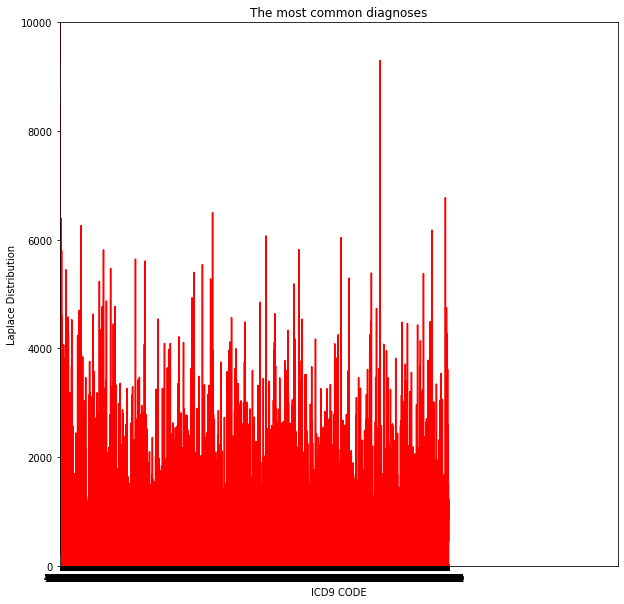

In [ ]:
# Plot visualization of Laplace distribution with Epsilon=0.001
ICD9_CODE =  list(Case_Study_Data['ICD9_CODE'])
Laplace_4 = list(Case_Study_Data['Laplace_0.001'])
fig, ax = plt.subplots(figsize=(10, 10))
plt.xlim(0, 10000) 
plt.ylim(0, 10000)                                    # Changed y axis scale for better visualization
plt.plot(ICD9_CODE, Laplace_4, color='red')
plt.xlabel('ICD9 CODE')
plt.ylabel('Laplace Distribution')
plt.title('The most common diagnoses')
plt.show()

# Observation
From the above plots we can clearly observe that when the noise is added to the original data the values were fluctuating randomly and when the epsilon value is low, it adds more noise to the original data. Normally in Machine Learning models, we will tend to reduce the noise in the data, so that we will have better predicted results. 

But in our case, we should allow someone to predict the original data of the users. To provide more privacy, we can add more noise to the data, so that its values will be highly deviating from the original value. 

Even though, we add more noise to the data and keep its privacy rate higher, we can't guarantee 100% that the data is secure. 